In [1]:
## Import libraries
import codecs
import shutil
import numpy as np
import pandas as pd 
import os
import io

# microCT ctan --> .csv (2D)
**Cold Regions Research & Engineering Lab (CRREL)** \
**Author:** Anna Valentine (annadigssnow@gmail.com) \
**Updated:** 02/02/2022

### Purpose:  
Takes in Ctan/batman files from microCT and concatonates the 2D results from the snowpit into one dataframe. This is meant for one snowpit at a time. 

We can see here that one of the original cTan .csv file is kinda gross and has a LOT of data. Each "snowpit" is comprised of a folder with ~50 files (depending on how deep pit was) of each 2cm segment that went into the microCT for analysis. Each 2cm segment file has both 2D and 3D data analysis. The 2D data from each 2cm segment file was pulled and concatonated into one easy to read in .csv file. In the auxillary files of this GitHub you can find a variable library for full names of variables, I took out full names so that data analysis would be easier, you can also find these in the OG files. 

2D data are analysis of each 20micrometer slice. There are a lot of different parameters calculated, I haven't seen a readME with how they are calculated but you might be able to ask Zoe Courville or Lauren Farnsworth from CRREL. 

### Sections: 
- **File Convert**: how to use the function to convert files
- **Examples**: some examples to hopefully get started
- **Quick Start**: a quick start of what the output files look like/visualization



# FILE CONVERT: 

In [2]:
## import in the .py file so we can use the function
import mCT2D_CSV 

**``mCT2D_CSV.convert(path, outpath= None, pitname=None, to_csv=True, verbose=True):``** \
        
``path: path to microCT folder of pits
      **kwargs:
      outpath: output path for .csv file(s). Default is to save to cwd. 
      pitname: convert just one folder (pit) in path, returns dataframe and saves .csv to cwd 
      to_csv: option to not save to .csv
      verbose: option to not print error messages/other messages within function``
        
**``return:``** ``none if many snowpits (folders), pandas dataframe if one snowpit ``


## EXAMPLES

In [3]:
## import in the .py file so we can use the function
import mCT2D_CSV as convert

In [4]:
### DEFINE INPUT/OUTPUT PATH
path = '/Users/annav/1_CRREL/micro_struct/mCT Data/'  # Directory that I am working in
outpath = '/Users/annav/1_CRREL/micro_struct/mCT CSV Test 2/' # Folder I want my .csv files to go to 

**1. all files in folder, output to path specified:**

In [5]:
convert.convert(path, outpath= outpath)

Folders to Convert:
1S17
2D mCT CSV
2N13
2S16
2S7
9C16
UTF8
######################### 

1S17  .csv saved to: /Users/annav/1_CRREL/micro_struct/mCT CSV Test 2/MCT_2D1S17.csv
Fail on File: /Users/annav/1_CRREL/micro_struct/mCT Data\2D mCT CSV
scan depth typo on file: 2n13_113_111cm_20um_rec_voi_1099.bmp CORRECTION:  113-111cm
scan depth typo on file: 2n13_131_129cm_20um_redo_rec_voi_1093.bmp CORRECTION:  131-129cm
2N13  .csv saved to: /Users/annav/1_CRREL/micro_struct/mCT CSV Test 2/MCT_2D2N13.csv
2S16  .csv saved to: /Users/annav/1_CRREL/micro_struct/mCT CSV Test 2/MCT_2D2S16.csv
scan depth typo on file: 2s7_68_65cm_20um_rec_voi_1020.bmp CORRECTION:  68-65cm
scan depth typo on file: 2s7_71_68cm_20um_rec_voi_1050.bmp CORRECTION:  71-68cm
2S7  .csv saved to: /Users/annav/1_CRREL/micro_struct/mCT CSV Test 2/MCT_2D2S7.csv
9C16  .csv saved to: /Users/annav/1_CRREL/micro_struct/mCT CSV Test 2/MCT_2D9C16.csv
Fail on File: /Users/annav/1_CRREL/micro_struct/mCT Data\UTF8
########################

**2. one pit, outputs dataframe**

In [6]:
pitname = '2S16'
df_2S16 = convert.convert(path, pitname=pitname, to_csv=False)  ## i do not want a .csv file to be saved

In [7]:
df_2S16

,File Name,Pos.Z,Obj.N,T.Ar,Obj.Ar,Obj.Ar/T.Ar,T.Pm,Obj.Pm,Obj.Pm/Obj.Ar,Av.Obj.Ar,...,MMI(min),T.Or(phi),Ecc,St.Th(pl),St.Sp(pl),St.Li.Dn(pl),FD,i.Pm,Scan Depth,Depth.Z
891,2s16_4-2cm_20um_rec_voi_0180.bmp,0.370645,110.0,139.89625,41.22321,29.46699,47.29488,352.49472,8.55088,0.37476,...,NaN,167.07859,0.38401,0.23389,0.55986,1.25984,1.68430,0.18532,4-2cm,2.370645
890,2s16_4-2cm_20um_rec_voi_0181.bmp,0.372704,111.0,139.89625,40.96658,29.28354,47.29488,355.05027,8.66683,0.36907,...,NaN,164.46210,0.35839,0.23076,0.55727,1.26898,1.68501,0.18532,4-2cm,2.372704
889,2s16_4-2cm_20um_rec_voi_0182.bmp,0.374763,110.0,139.89625,40.77700,29.14803,47.29488,354.97582,8.70530,0.37070,...,NaN,161.60868,0.33083,0.22975,0.55846,1.26871,1.68173,0.18532,4-2cm,2.374763
888,2s16_4-2cm_20um_rec_voi_0183.bmp,0.376822,105.0,139.89625,40.57024,29.00023,47.29488,354.15595,8.72945,0.38638,...,NaN,160.37567,0.30200,0.22911,0.56092,1.26578,1.68069,0.18532,4-2cm,2.376822
887,2s16_4-2cm_20um_rec_voi_0184.bmp,0.378881,100.0,139.89625,40.33561,28.83252,47.29488,352.47609,8.73858,0.40336,...,NaN,159.43418,0.29058,0.22887,0.56492,1.25978,1.68250,0.18532,4-2cm,2.378881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2s16_93-91cm_20um_redo_rec_voi_0936.bmp,1.927354,199.0,136.03441,40.72813,29.93958,46.63595,482.07494,11.83641,0.20466,...,NaN,102.59743,0.20558,0.16897,0.39540,1.77189,1.78806,0.18532,93-91cm,92.927354
4,2s16_93-91cm_20um_redo_rec_voi_0937.bmp,1.929413,198.0,136.03441,40.47802,29.75572,46.63595,482.93407,11.93077,0.20443,...,NaN,94.94907,0.20237,0.16763,0.39573,1.77504,1.78649,0.18532,93-91cm,92.929413
3,2s16_93-91cm_20um_redo_rec_voi_0938.bmp,1.931472,220.0,136.03441,40.23188,29.57479,46.63595,487.53533,12.11813,0.18287,...,NaN,85.98734,0.22034,0.16504,0.39301,1.79196,1.76518,0.18532,93-91cm,92.931472
2,2s16_93-91cm_20um_redo_rec_voi_0939.bmp,1.933531,228.0,136.03441,40.17682,29.53430,46.63595,493.16460,12.27485,0.17621,...,NaN,81.26215,0.24384,0.16293,0.38874,1.81265,1.79022,0.18532,93-91cm,92.933531


### Great! 
Now we have all of those nasty files converted and they are saved into my mCT Data folder as a new folder called 2D mCT CSV. If you want to check out the notebook that does this/how it does so mess around with the jupyter notebook included in the files or just take a look at the .py it runs off of.  

## QUICK START w/ .CSV FILES

In [8]:
from glob import glob

In [9]:
mCT_path = '../mCT CSV Test/*.csv'
mCT_2D_files = glob(mCT_path)
print(mCT_2D_files)

['../mCT CSV Test\\MCT_2D1S17.csv', '../mCT CSV Test\\MCT_2D2N13.csv', '../mCT CSV Test\\MCT_2D2S16.csv', '../mCT CSV Test\\MCT_2D2S7.csv', '../mCT CSV Test\\MCT_2D9C16.csv', '../mCT CSV Test\\M_RESULTS_2D1S17.csv']


In [10]:
## Example File
mCT_2D = pd.read_csv(mCT_2D_files[0])
mCT_2D.head()

,File Name,Pos.Z,Obj.N,T.Ar,Obj.Ar,Obj.Ar/T.Ar,T.Pm,Obj.Pm,Obj.Pm/Obj.Ar,Av.Obj.Ar,...,MMI(min),T.Or(phi),Ecc,St.Th(pl),St.Sp(pl),St.Li.Dn(pl),FD,i.Pm,Scan Depth,Depth.Z
0,1s17_5-3cm_20um_rec_voi_0100.bmp,0.205914,132.0,93.99345,19.81546,21.08174,36.26756,232.07129,11.71163,0.15012,...,NaN,13.79212,0.71903,0.17077,0.63927,1.23451,1.56228,7.34945,5-3cm,3.205914
1,1s17_5-3cm_20um_rec_voi_0101.bmp,0.207973,135.0,93.99345,19.13429,20.35705,36.26756,219.67912,11.48091,0.14174,...,NaN,15.70913,0.73546,0.17420,0.68153,1.16859,1.55020,7.21384,5-3cm,3.207973
2,1s17_5-3cm_20um_rec_voi_0102.bmp,0.210032,127.0,93.99345,18.55945,19.74547,36.26756,213.09180,11.48158,0.14614,...,NaN,17.19467,0.75207,0.17419,0.70800,1.13355,1.35948,7.18015,5-3cm,3.210032
3,1s17_5-3cm_20um_rec_voi_0103.bmp,0.212091,130.0,93.99345,18.02880,19.18091,36.26756,210.02793,11.64958,0.13868,...,NaN,19.02569,0.76306,0.17168,0.72338,1.11725,1.54014,6.88438,5-3cm,3.212091
4,1s17_5-3cm_20um_rec_voi_0104.bmp,0.214150,120.0,93.99345,17.54708,18.66841,36.26756,205.02932,11.68453,0.14623,...,NaN,19.98690,0.76736,0.17117,0.74571,1.09066,1.53633,6.28430,5-3cm,3.214150


In [11]:
mCT_2D.describe()

,Pos.Z,Obj.N,T.Ar,Obj.Ar,Obj.Ar/T.Ar,T.Pm,Obj.Pm,Obj.Pm/Obj.Ar,Av.Obj.Ar,Av.Obj.ECDa,...,MMI(max),MMI(min),T.Or(phi),Ecc,St.Th(pl),St.Sp(pl),St.Li.Dn(pl),FD,i.Pm,Depth.Z
count,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,...,0.0,0.0,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000,53837.000000
mean,1.149398,118.220295,136.314321,33.226304,25.075805,46.088507,296.662233,8.900919,0.369484,0.664902,...,NaN,NaN,89.119193,0.329182,0.237328,0.774000,1.128678,1.619907,2.150104,48.710090
std,0.578078,72.353270,22.049907,5.820948,6.218794,4.835418,99.708420,2.193617,0.177040,0.168370,...,NaN,NaN,52.721719,0.118641,0.052133,0.310639,0.447457,0.092323,4.580871,25.334725
min,0.061774,22.000000,93.993450,9.967090,8.097130,36.267560,97.978880,5.329890,0.095790,0.349230,...,NaN,NaN,0.000800,0.012140,0.138070,0.217860,0.344710,1.264460,0.000000,3.205914
25%,0.658924,67.000000,130.368010,29.177700,20.851870,45.647570,234.830330,7.110310,0.199320,0.503770,...,NaN,NaN,41.613260,0.244700,0.185090,0.509810,0.808360,1.560700,0.000000,26.679145
50%,1.144881,86.000000,139.453590,33.337190,23.879070,47.253690,267.634960,8.057320,0.363750,0.680540,...,NaN,NaN,89.067240,0.322320,0.248220,0.786470,0.957330,1.613610,0.000000,49.338440
75%,1.634956,159.000000,151.878630,36.936830,28.347040,49.271650,323.271780,10.805430,0.504520,0.801480,...,NaN,NaN,135.767450,0.402370,0.281280,0.965080,1.372090,1.669980,0.185320,70.415946
max,2.265052,374.000000,179.259610,50.679050,45.678070,53.595840,659.676600,14.485060,1.375330,1.323300,...,NaN,NaN,179.994960,0.862050,0.375240,2.658790,2.779730,1.856860,17.311940,93.935590


C:\Users\annav\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


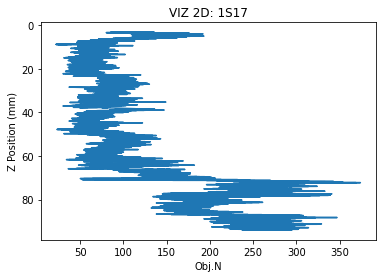

In [12]:
import matplotlib.pyplot as plt

### A quick vizualization: 
plt.title("VIZ 2D: 1S17")
plt.plot(mCT_2D['Obj.N'],mCT_2D['Depth.Z']) #Smoothed SMP SSA 
plt.ylabel("Z Position (mm)")
plt.xlabel("Obj.N")
plt.gca().invert_yaxis()  #because depth increases as we go down